In [ ]:
#1
import numpy as np
import pandas as pd

# Load the dataset
file_path = "/output_s234.xlsx"
df = pd.read_excel(file_path)

# Function to calculate entropy
def entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Compute entropy for the "Fluency" column
target_column = "Fluency"
entropy_value = entropy(df[target_column])

print(f"Entropy of {target_column}: {entropy_value}")


Entropy of Fluency: 0.9509560484549725


In [ ]:
#2
import numpy as np
import pandas as pd

# Load the dataset
file_path = "/output_s234.xlsx"
df = pd.read_excel(file_path)

# Function to calculate Gini index
def gini_index(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

# Compute Gini index for the target column
target_column = "Fluency"
gini_value = gini_index(df[target_column])

print(f"Gini Index of {target_column}: {gini_value}")


Gini Index of Fluency: 0.46639231824417005


In [ ]:
#3 #4 #5
import numpy as np
import pandas as pd
from collections import Counter
from math import log2

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count/total) * log2(count/total) for count in counts.values())

# Function to calculate Information Gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i]/sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Function for binning continuous features with default parameters
def bin_continuous_feature(data, column, num_bins=3, method='equal_width'):
    """Bins a continuous feature using equal-width or equal-frequency binning."""
    if method not in ['equal_width', 'equal_frequency']:
        raise ValueError("Invalid binning method. Choose 'equal_width' or 'equal_frequency'.")

    if method == 'equal_width':
        data[column + '_binned'] = pd.cut(data[column], bins=num_bins, labels=False)
    else:  # equal_frequency
        data[column + '_binned'] = pd.qcut(data[column], q=num_bins, labels=False, duplicates='drop')

    return data

# Load and preprocess data
data = pd.read_excel("/output_s234.xlsx", sheet_name="Sheet1")

# Binning continuous features with function overloading (default parameters used if none provided)
data = bin_continuous_feature(data, 'Start time')
data = bin_continuous_feature(data, 'End time', num_bins=4, method='equal_frequency')

# Selecting the best root node based on Information Gain
features = ['Start time_binned', 'End time_binned', 'Member']
target = 'Fluency'
best_feature = max(features, key=lambda f: information_gain(data, f, target))

print("Best root node feature:", best_feature)


Best root node feature: End time_binned


In [ ]:
#6
import numpy as np
import pandas as pd
from collections import Counter
from math import log2

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count/total) * log2(count/total) for count in counts.values())

# Function to calculate Information Gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i]/sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Function for binning continuous features with default parameters
def bin_continuous_feature(data, column, num_bins=3, method='equal_width'):
    """Bins a continuous feature using equal-width or equal-frequency binning."""
    if method not in ['equal_width', 'equal_frequency']:
        raise ValueError("Invalid binning method. Choose 'equal_width' or 'equal_frequency'.")

    if method == 'equal_width':
        data[column + '_binned'] = pd.cut(data[column], bins=num_bins, labels=False)
    else:  # equal_frequency
        data[column + '_binned'] = pd.qcut(data[column], q=num_bins, labels=False, duplicates='drop')

    return data

# Function to build a Decision Tree recursively
def build_decision_tree(data, features, target):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]

    if not features:
        return data[target].mode()[0]

    best_feature = max(features, key=lambda f: information_gain(data, f, target))
    tree = {best_feature: {}}

    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        subtree = build_decision_tree(subset, [f for f in features if f != best_feature], target)
        tree[best_feature][value] = subtree

    return tree

# Load and preprocess data
data = pd.read_excel("/output_s234.xlsx", sheet_name="Sheet1")

# Binning continuous features with function overloading (default parameters used if none provided)
data = bin_continuous_feature(data, 'Start time')
data = bin_continuous_feature(data, 'End time', num_bins=4, method='equal_frequency')

# Selecting the best root node based on Information Gain
features = ['Start time_binned', 'End time_binned', 'Member']
target = 'Fluency'
decision_tree = build_decision_tree(data, features, target)

print("Decision Tree:", decision_tree)


Decision Tree: {'End time_binned': {0: 1, 1: {'Start time_binned': {0: {'Member': {'S': 1}}}}, 2: {'Start time_binned': {1: {'Member': {'S': 0}}}}, 3: {'Start time_binned': {2: {'Member': {'S': 1}}}}}}


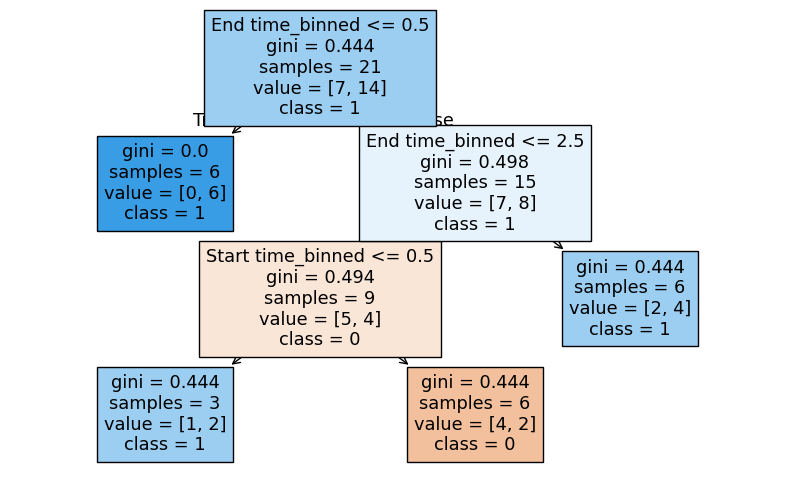

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


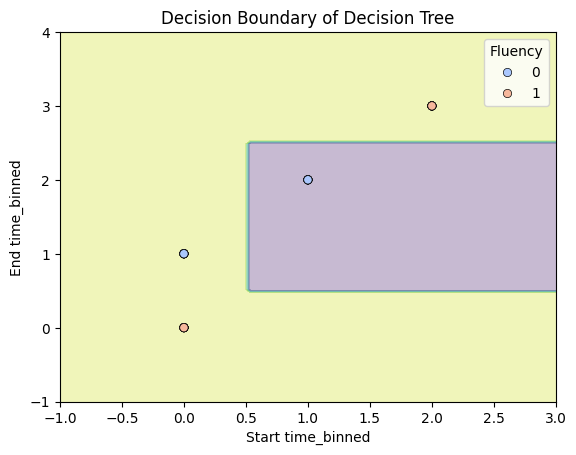

In [ ]:
#7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count/total) * log2(count/total) for count in counts.values())

# Function to calculate Information Gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i]/sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Function for binning continuous features with default parameters
def bin_continuous_feature(data, column, num_bins=3, method='equal_width'):
    """Bins a continuous feature using equal-width or equal-frequency binning."""
    if method not in ['equal_width', 'equal_frequency']:
        raise ValueError("Invalid binning method. Choose 'equal_width' or 'equal_frequency'.")

    if method == 'equal_width':
        data[column + '_binned'] = pd.cut(data[column], bins=num_bins, labels=False)
    else:  # equal_frequency
        data[column + '_binned'] = pd.qcut(data[column], q=num_bins, labels=False, duplicates='drop')

    return data

# Load and preprocess data
data = pd.read_excel("/output_s234.xlsx", sheet_name="Sheet1")

# Binning continuous features with function overloading (default parameters used if none provided)
data = bin_continuous_feature(data, 'Start time')
data = bin_continuous_feature(data, 'End time', num_bins=4, method='equal_frequency')

# Encode categorical features
label_encoders = {}
for col in ['Start time_binned', 'End time_binned', 'Member', 'Fluency']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting dataset
X = data[['Start time_binned', 'End time_binned']]
y = data['Fluency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Visualizing Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(dt, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True)
plt.show()

# Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Decision Boundary of Decision Tree")
    plt.show()

plot_decision_boundary(dt, X, y)
